In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
train = pd.read_csv('Data/train.csv',index_col=0)
test = pd.read_csv('Data/test.csv',index_col=0)

In [3]:
train.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
print("Shape of train dataset: ",train.shape)
print("Shape of test dataset: ",test.shape)

Shape of train dataset:  (1460, 80)
Shape of test dataset:  (1459, 79)


## Exploratory Data Analysis

For analysis purpose, i will combine the train and test dataset and try to gain the insights

### 1. Univariate Analysis

In [5]:
x_full = pd.concat([train.drop('SalePrice',axis=1),test])
x_full.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml


In [6]:
x_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
x_full['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40, 150], dtype=int64)

**MSSubClass** is nominal in behaviour. so excluding it from numeric feature list.

In [8]:
num_list = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
print(len(num_list))

35


In [9]:
x_numeric_list = [col for col in x_full.columns.difference(['MSSubClass']) if x_full[col].dtypes in ['int64','float64','int32','float32']]
print(x_numeric_list)
print("\n\n number of features: ",len(x_numeric_list))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


 number of features:  35


In [10]:
cat_list = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass']
len(cat_list)

44

In [11]:
x_categoric_list = [col for col in x_full.columns if x_full[col].dtypes in ['object']]
x_categoric_list.append('MSSubClass')
print(x_categoric_list)

print("\n\n number of features: ",len(x_categoric_list))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']


 number of features:  44


Now we will try to analyze if there is any discrete variable presents in x_numeric_list by obeserving below graphs

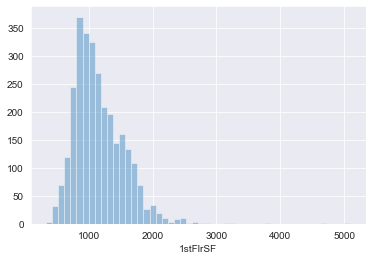

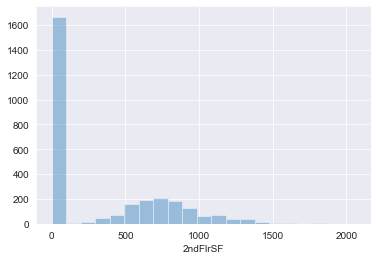

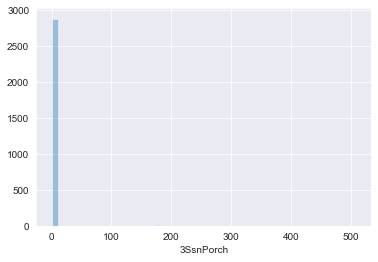

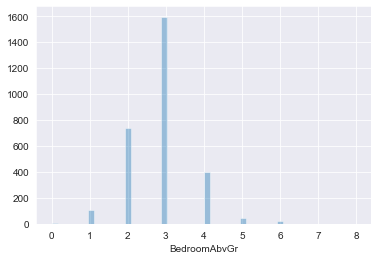

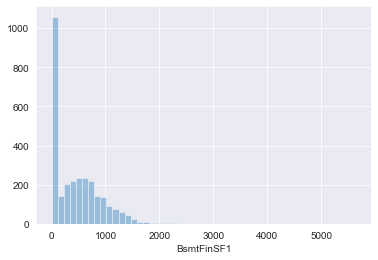

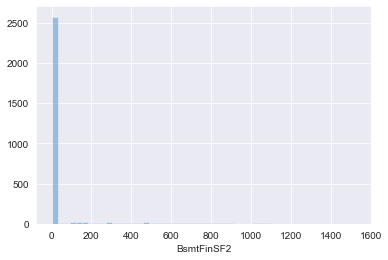

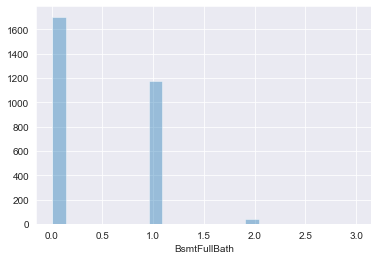

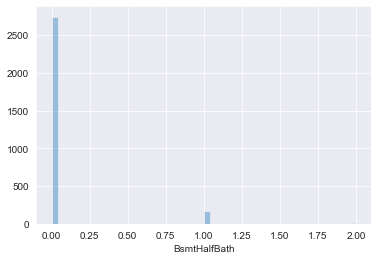

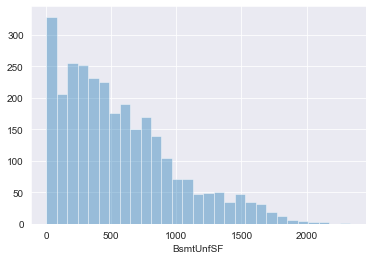

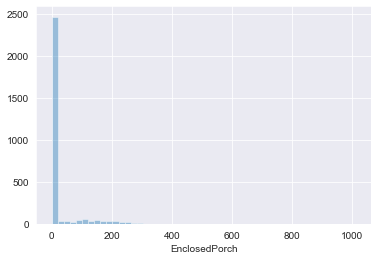

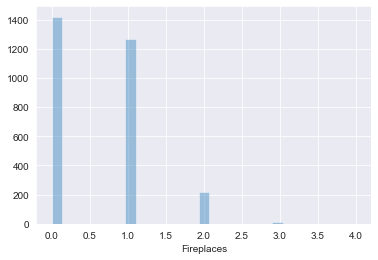

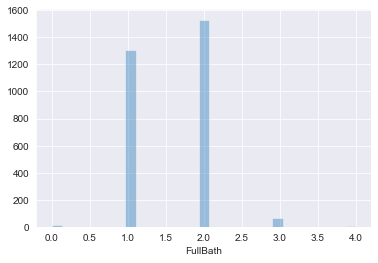

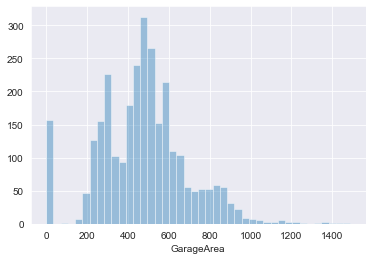

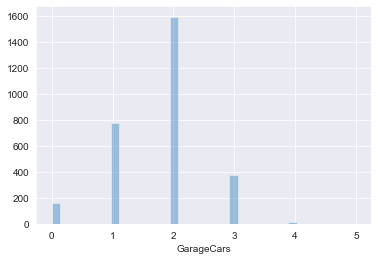

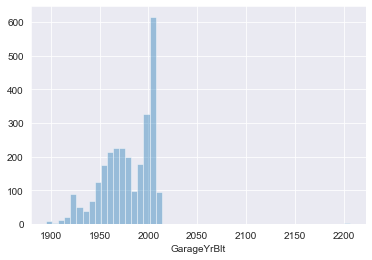

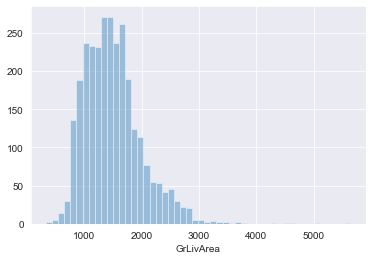

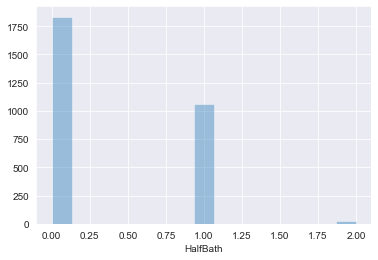

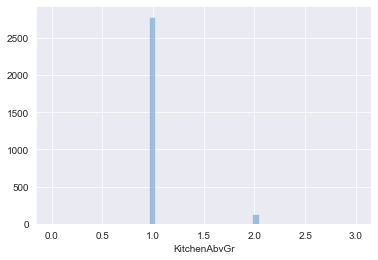

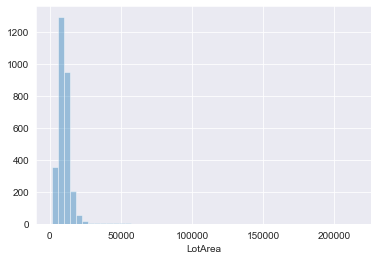

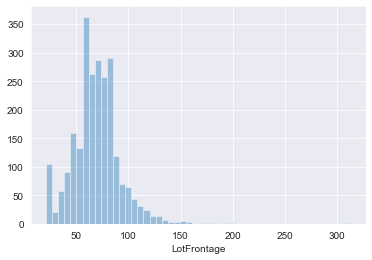

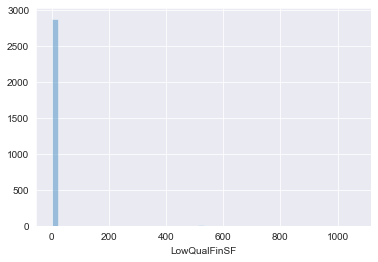

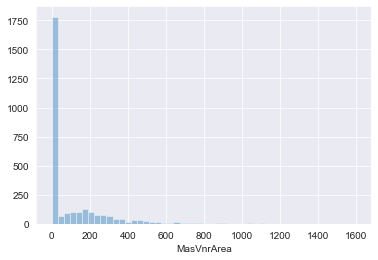

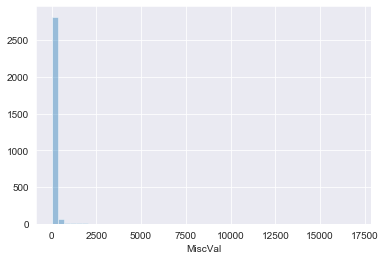

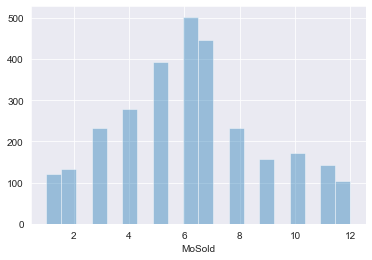

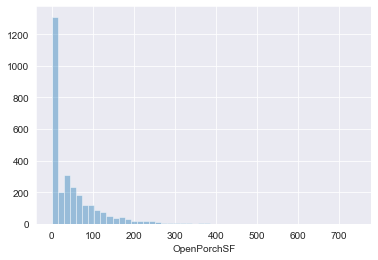

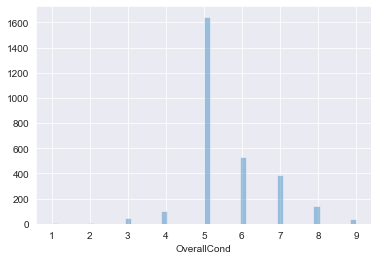

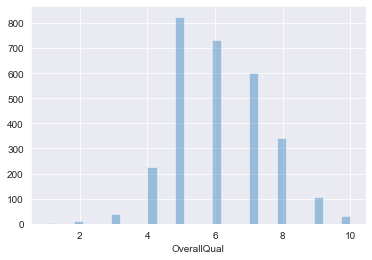

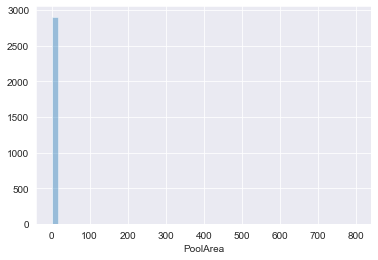

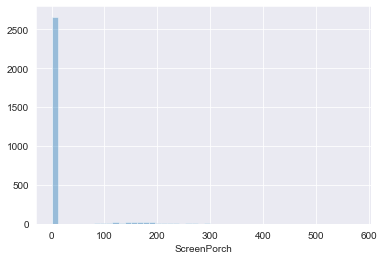

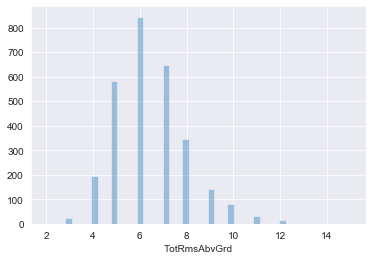

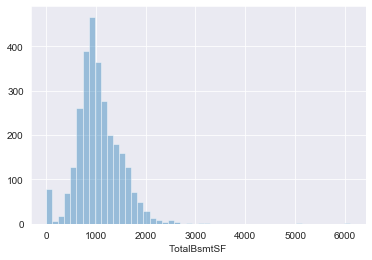

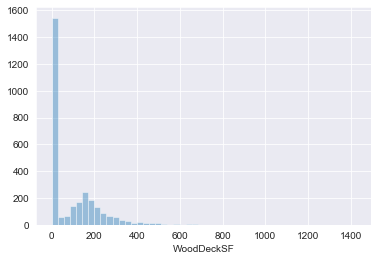

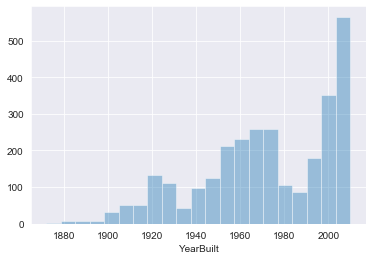

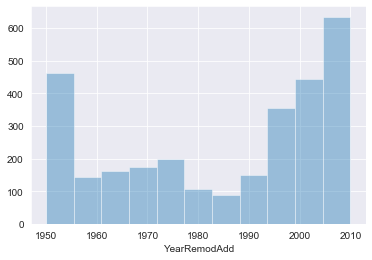

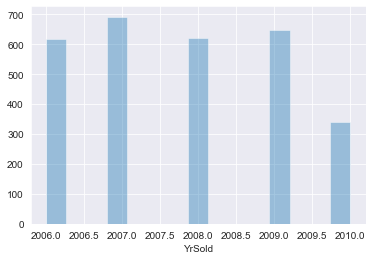

In [12]:
for var in x_numeric_list:
    sns.distplot(x_full[var],hist=True,kde=False)
    plt.show()

by observing above graphs, we can see that below features have mostly single values in majority.

In [13]:
x_discrete_singlevalue = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
print(x_discrete_singlevalue)


print("\n\n number of features : ",len(x_discrete_singlevalue))

['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


 number of features :  7


In [14]:
for i in x_discrete_singlevalue:
    print(i,":\n")
    print(x_full[i].value_counts())
    print("\n***********************************************")

BsmtFinSF2 :

0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

***********************************************
LowQualFinSF :

0       2879
80         4
205        2
360        2
390        1
384        1
362        1
312        1
234        1
232        1
420        1
156        1
144        1
140        1
120        1
114        1
108        1
392        1
697        1
515        1
371        1
513        1
481        1
479        1
473        1
431        1
397        1
259        1
450        1
53         1
1064       1
572        1
528        1
514        1
512        1
436        1
Name: LowQualFinSF, dtype: int64

***********************************************
EnclosedPorch :

0      2460
112      22
96       13
144      11
192      10
       ... 
334       1
330       1
324       1
318       1
238       1
Name: EnclosedPorch, Len

And also from above graphs, we can see that below features are discrete in nature. So we will treat these same as categorical features

In [15]:
x_discrete = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
print(x_discrete)

print("\n\n number of features : ",len(x_discrete))

['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']


 number of features :  13


In [16]:
for i in x_discrete:
    print(x_full[i].value_counts())
    print("\n")

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64


5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64


0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64


0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64


0    1834
1    1060
2      25
Name: HalfBath, dtype: int64


3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64


1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64


6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
15      1
13      1
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64


In [17]:
### appending x_discrete features into categorical features list

#x_categoric_list.append(x_discrete)
print("number of x_discrete features : ",len(x_discrete))
print("\nnumber of features before appending: ",len(x_categoric_list),"\n")
for c in x_discrete:
    x_categoric_list.append(c)
print(x_categoric_list)

print("\nnumber of features after appending: ",len(x_categoric_list))

number of x_discrete features :  13

number of features before appending:  44 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

number of features after appending:  57


In [18]:
###remove x_discrete features from numerical features list

print("number of features before removing: ",len(x_numeric_list),"\n\n")

x_numerical_features = [c for c in x_numeric_list if c not in x_discrete]
print(x_numerical_features)

print("\n\nnumber of features after removing: ",len(x_numerical_features))



number of features before removing:  35 


['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']


number of features after removing:  22


##### Numeric Variables Distribution

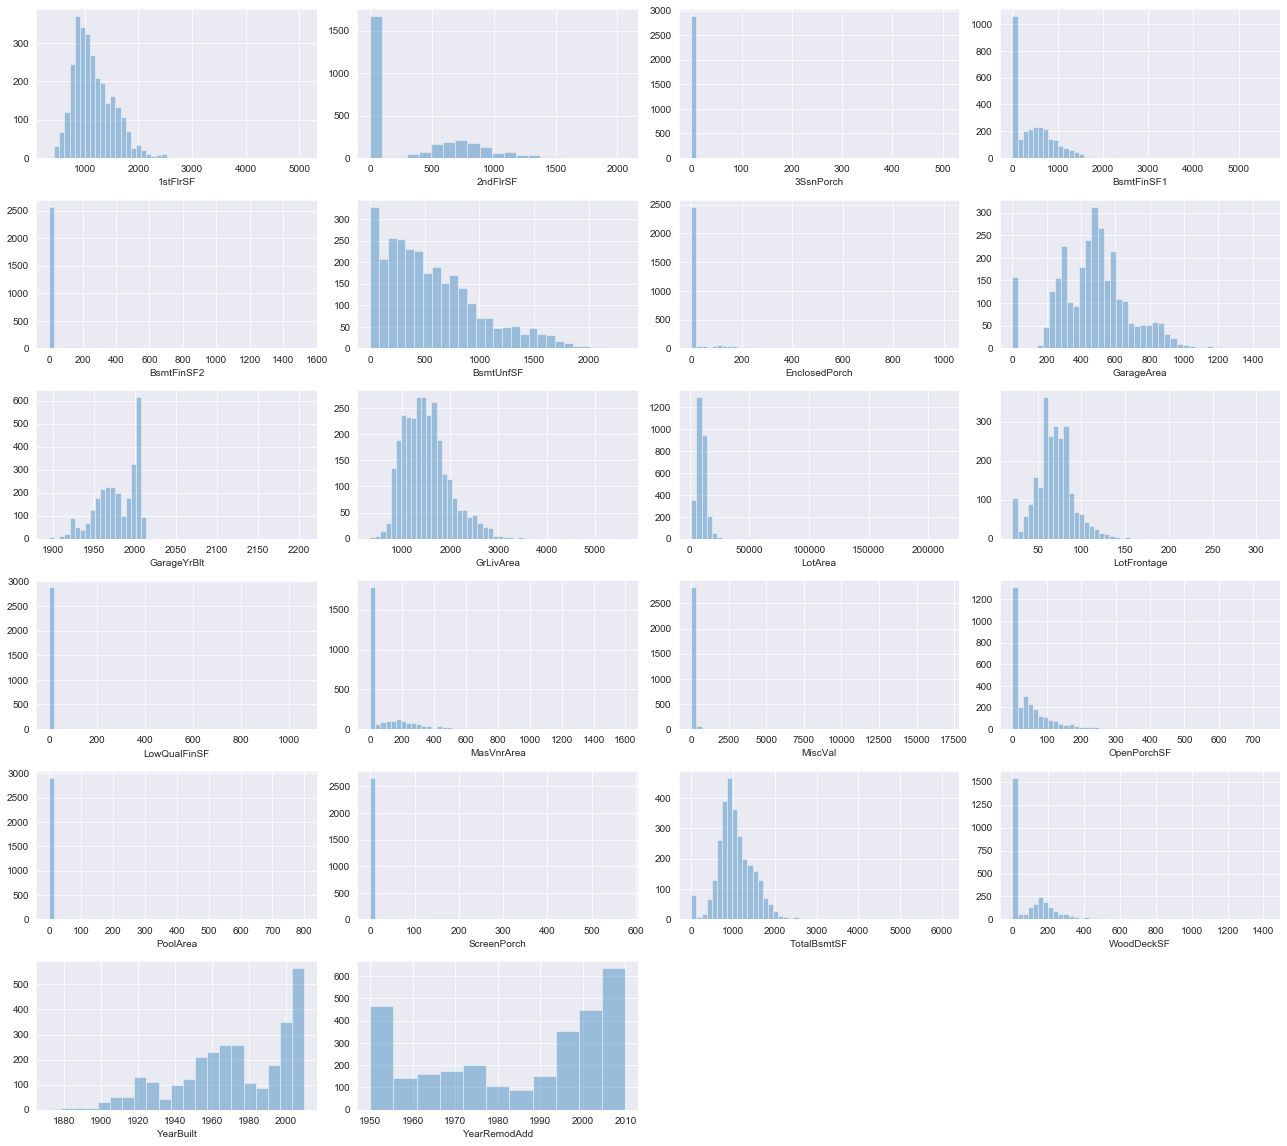

In [19]:
fig = plt.figure(figsize = (18,16))
for index,col in enumerate(x_numerical_features):
    plt.subplot(6,4,index+1)
    sns.distplot(x_full.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)

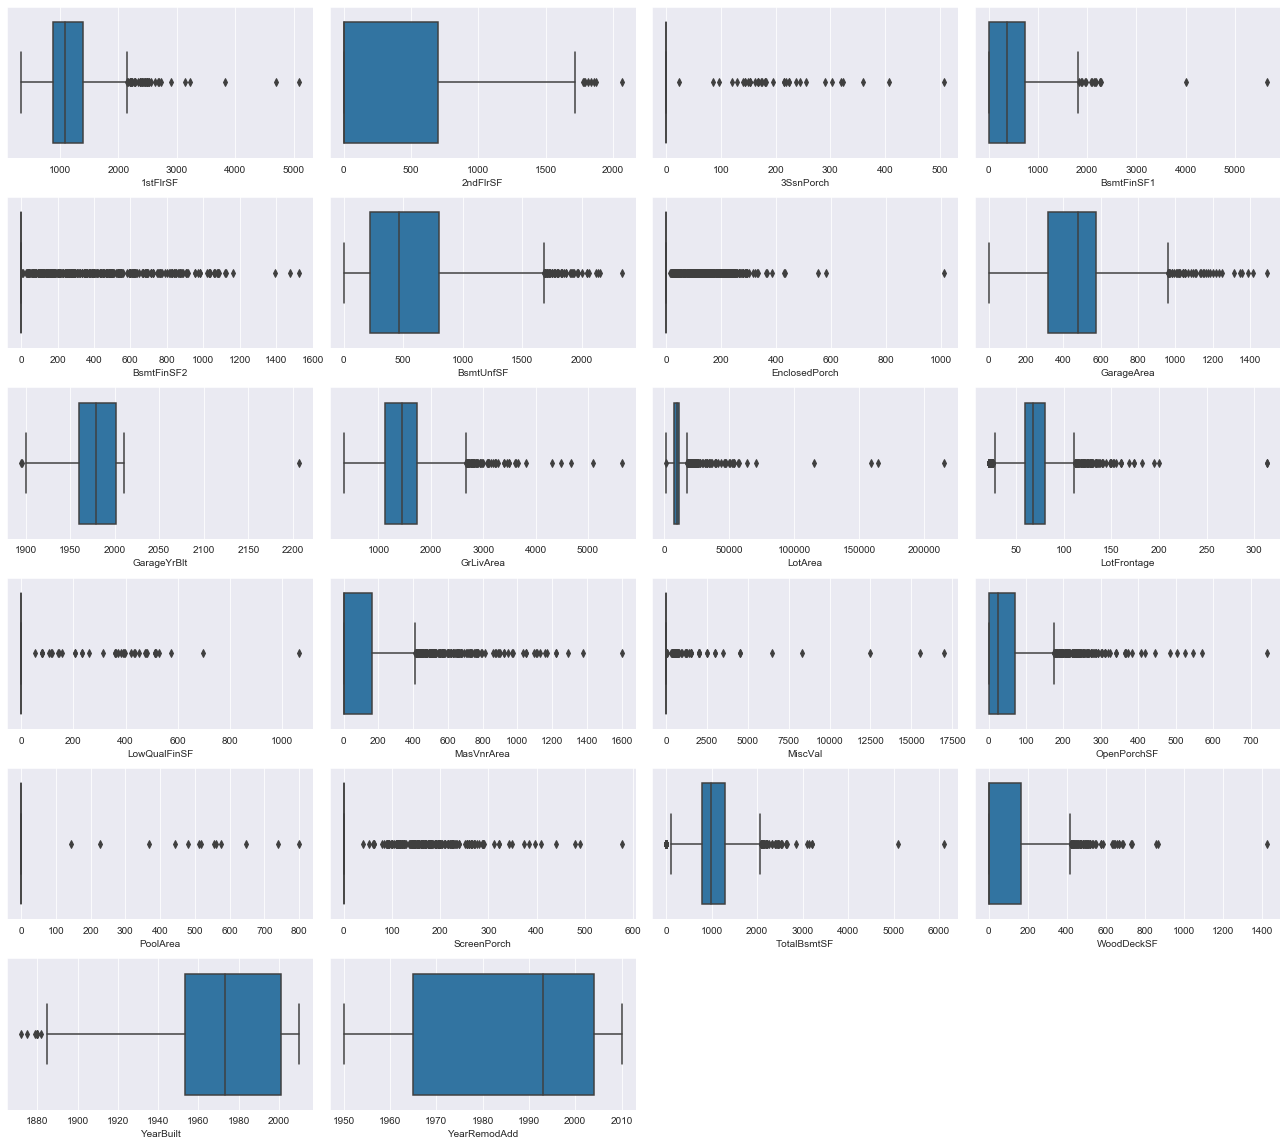

In [20]:
fig = plt.figure(figsize = (18,16))
for index,col in enumerate(x_numerical_features):
    plt.subplot(6,4,index+1)
    sns.boxplot(x=col,data=x_full)
fig.tight_layout(pad=1.0)

##### Categorical Variables Distribution

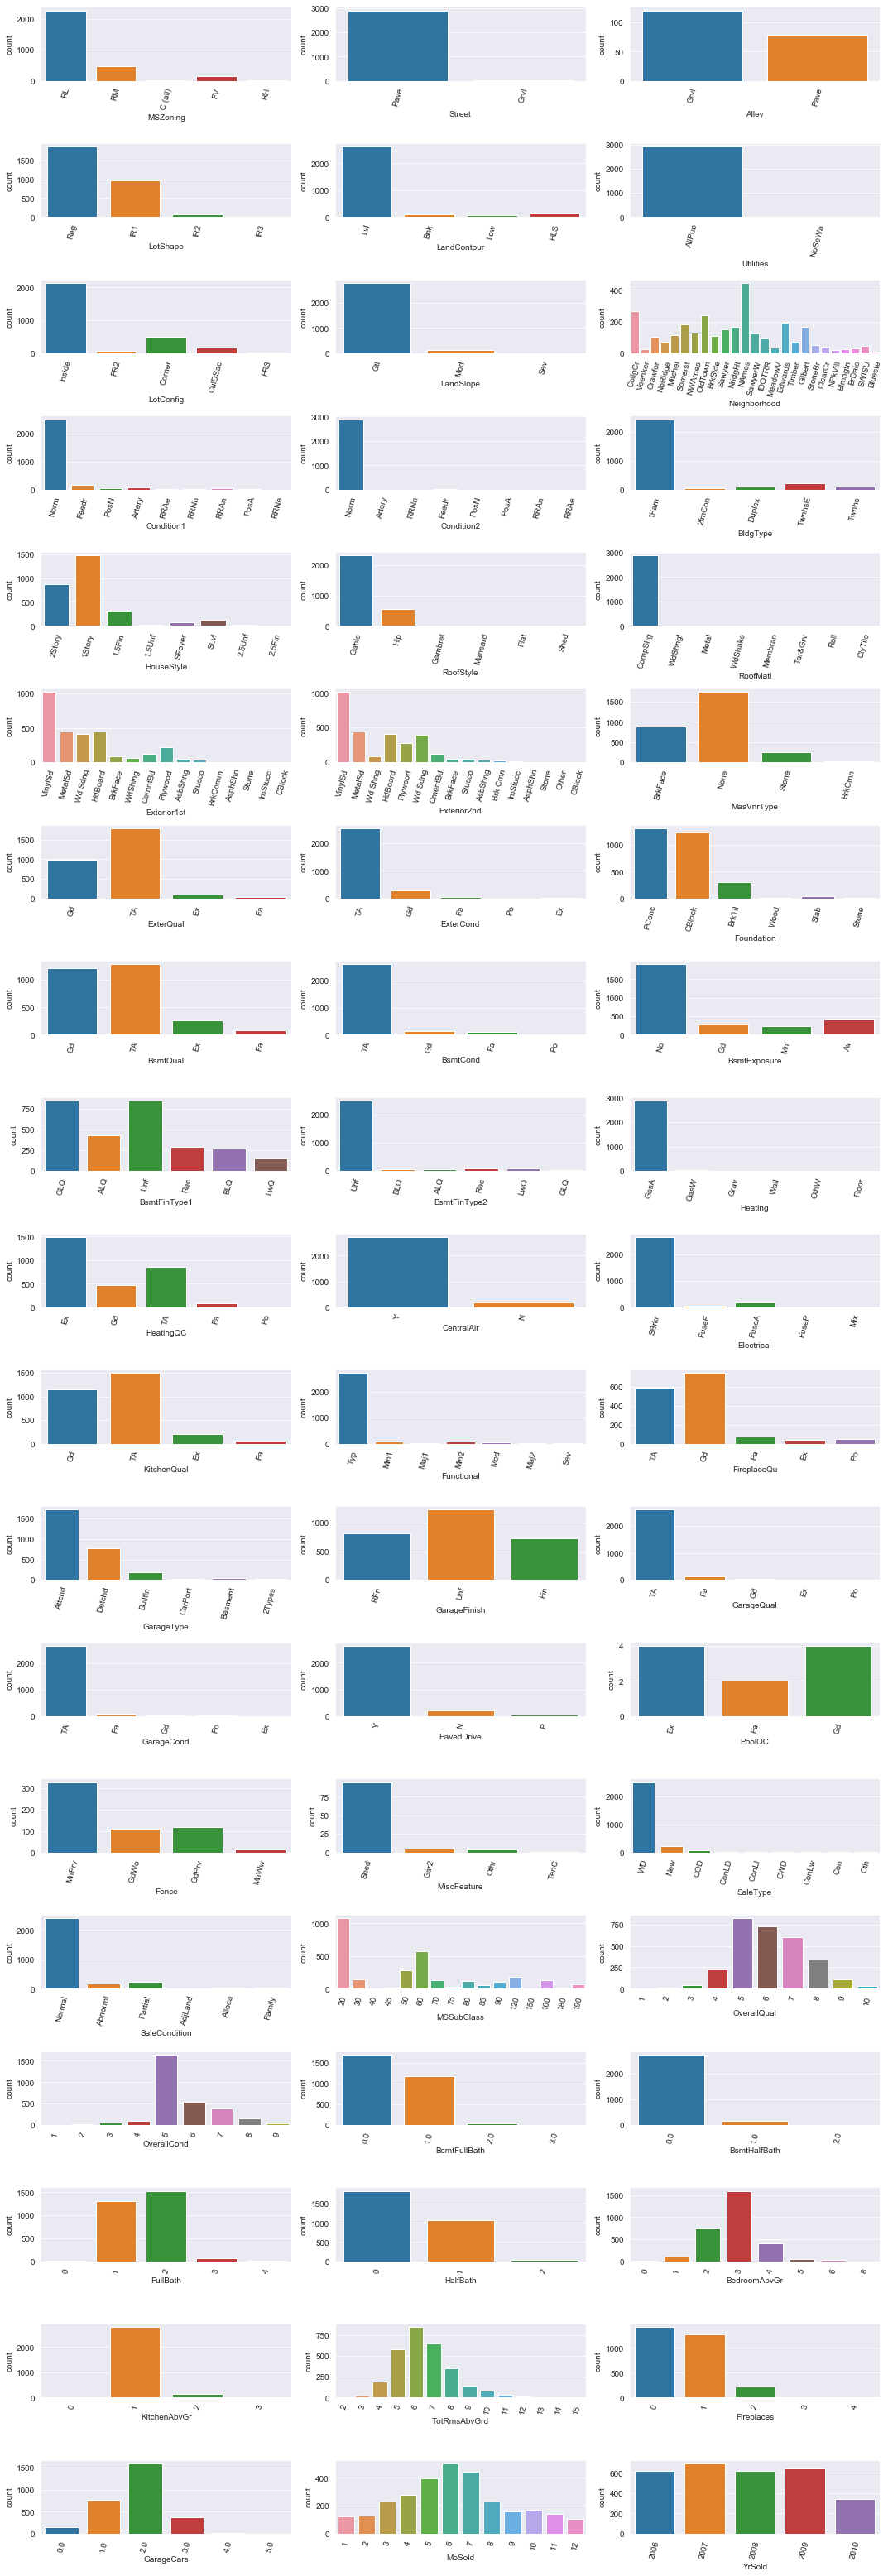

In [21]:
fig = plt.figure(figsize=(15,45))
for index,col in enumerate(x_categoric_list):
    plt.subplot(20,3,index+1)
    sns.countplot(x=col,data=x_full)
    plt.xticks(rotation=75)
fig.tight_layout(pad=1.0)

### 2. Bivariate Analysis

##### 2.1 Correlation matrix and heatmap

In [22]:
correlation_matrix = x_full[x_numerical_features].corr()
correlation_matrix

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,...,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
1stFlrSF,1.000000,-0.249823,0.044086,0.458092,0.084330,0.296600,-0.065796,0.492011,0.260450,0.562538,...,-0.012704,0.395834,0.093062,0.238502,0.121900,0.098381,0.801670,0.227347,0.310814,0.242245
2ndFlrSF,-0.249823,1.000000,-0.032458,-0.162301,-0.097744,-0.000376,0.054645,0.128570,0.086094,0.655085,...,0.017803,0.121014,-0.005299,0.185387,0.044503,0.011070,-0.205665,0.089922,0.017588,0.158985
3SsnPorch,0.044086,-0.032458,1.000000,0.050908,-0.023279,-0.005810,-0.032822,0.029440,0.020699,0.006268,...,-0.004545,0.013612,-0.000788,-0.009392,-0.006525,-0.029546,0.037892,-0.003935,0.015958,0.037433
BsmtFinSF1,0.458092,-0.162301,0.050908,1.000000,-0.055045,-0.477404,-0.099712,0.310449,0.194270,0.211669,...,-0.066028,0.303490,0.093295,0.124163,0.084462,0.096823,0.536467,0.223492,0.279581,0.152126
BsmtFinSF2,0.084330,-0.097744,-0.023279,-0.055045,1.000000,-0.238241,0.032740,0.003139,-0.068549,-0.017872,...,-0.004923,-0.015645,-0.005139,-0.005876,0.044524,0.063302,0.089410,0.098399,-0.027595,-0.062153
BsmtUnfSF,0.296600,-0.000376,-0.005810,-0.477404,-0.238241,1.000000,0.005006,0.164409,0.171588,0.233988,...,0.046913,0.090163,-0.010492,0.119764,-0.032273,-0.049158,0.412285,-0.039302,0.130473,0.165175
EnclosedPorch,-0.065796,0.054645,-0.032822,-0.099712,0.032740,0.005006,1.000000,-0.106417,-0.300751,0.003274,...,0.087212,-0.111499,0.008654,-0.059672,0.092534,-0.064377,-0.085510,-0.119114,-0.374073,-0.220456
GarageArea,0.492011,0.128570,0.029440,0.310449,0.003139,0.164409,-0.106417,1.000000,0.555836,0.485469,...,-0.053551,0.374061,0.008446,0.232559,0.053049,0.062389,0.486067,0.238075,0.480735,0.376765
GarageYrBlt,0.260450,0.086094,0.020699,0.194270,-0.068549,0.171588,-0.300751,0.555836,1.000000,0.273411,...,-0.051781,0.255112,-0.009203,0.231639,-0.014467,-0.062320,0.348408,0.222584,0.834812,0.652365
GrLivArea,0.562538,0.655085,0.006268,0.211669,-0.017872,0.233988,0.003274,0.485469,0.273411,1.000000,...,0.096916,0.402994,0.067118,0.341907,0.135441,0.086284,0.445276,0.251017,0.242666,0.316972


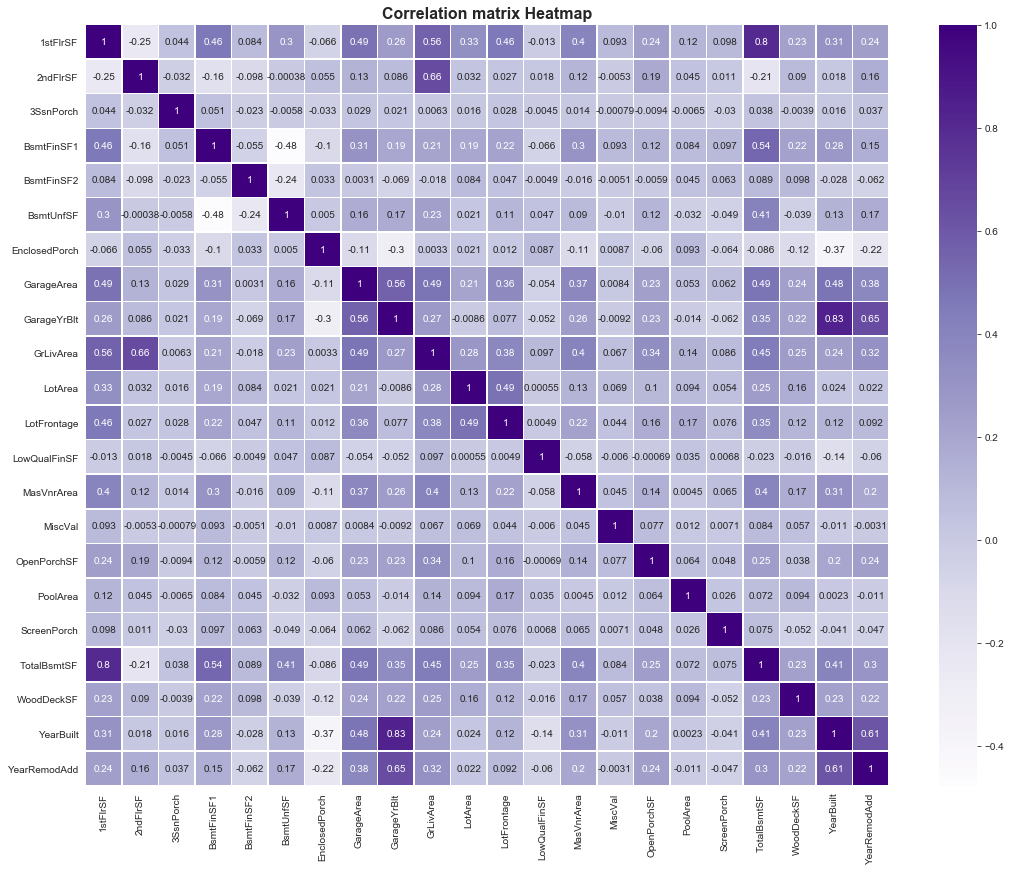

In [23]:
plt.figure(figsize=(18,14))

#sns.heatmap(correlation_matrix,linewidths=0.5,cmap='Purples',annot=True,mask=correlation_matrix<0.5)

sns.heatmap(correlation_matrix,linewidths=0.5,cmap='Purples',annot=True)
plt.title("Correlation matrix Heatmap",fontsize=16,fontweight='bold')
plt.show()

We can see that from above heatmap below variables have high correlation 

* GarageYrBlt and YearBuilt

* TotRmsAbvGrd and GrLivArea

* 1stFlrSF and TotalBsmtSF

* GarageArea and GarageCars

##### 2.2 Correlation between numerical independent and dependent variable

In [24]:
train_columns_list= []

train_columns_list = list(x_numeric_list)
train_columns_list.append('SalePrice')

print(train_columns_list)

numeric_correlation = train[train_columns_list].corr()
numeric_correlation[['SalePrice']].sort_values(by='SalePrice',ascending=False)

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice']


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


We can see that how independent variables are correlated with dependent variable(target)

OverallQual and GrLivArea has strongest correlation with target 'SalePrice'

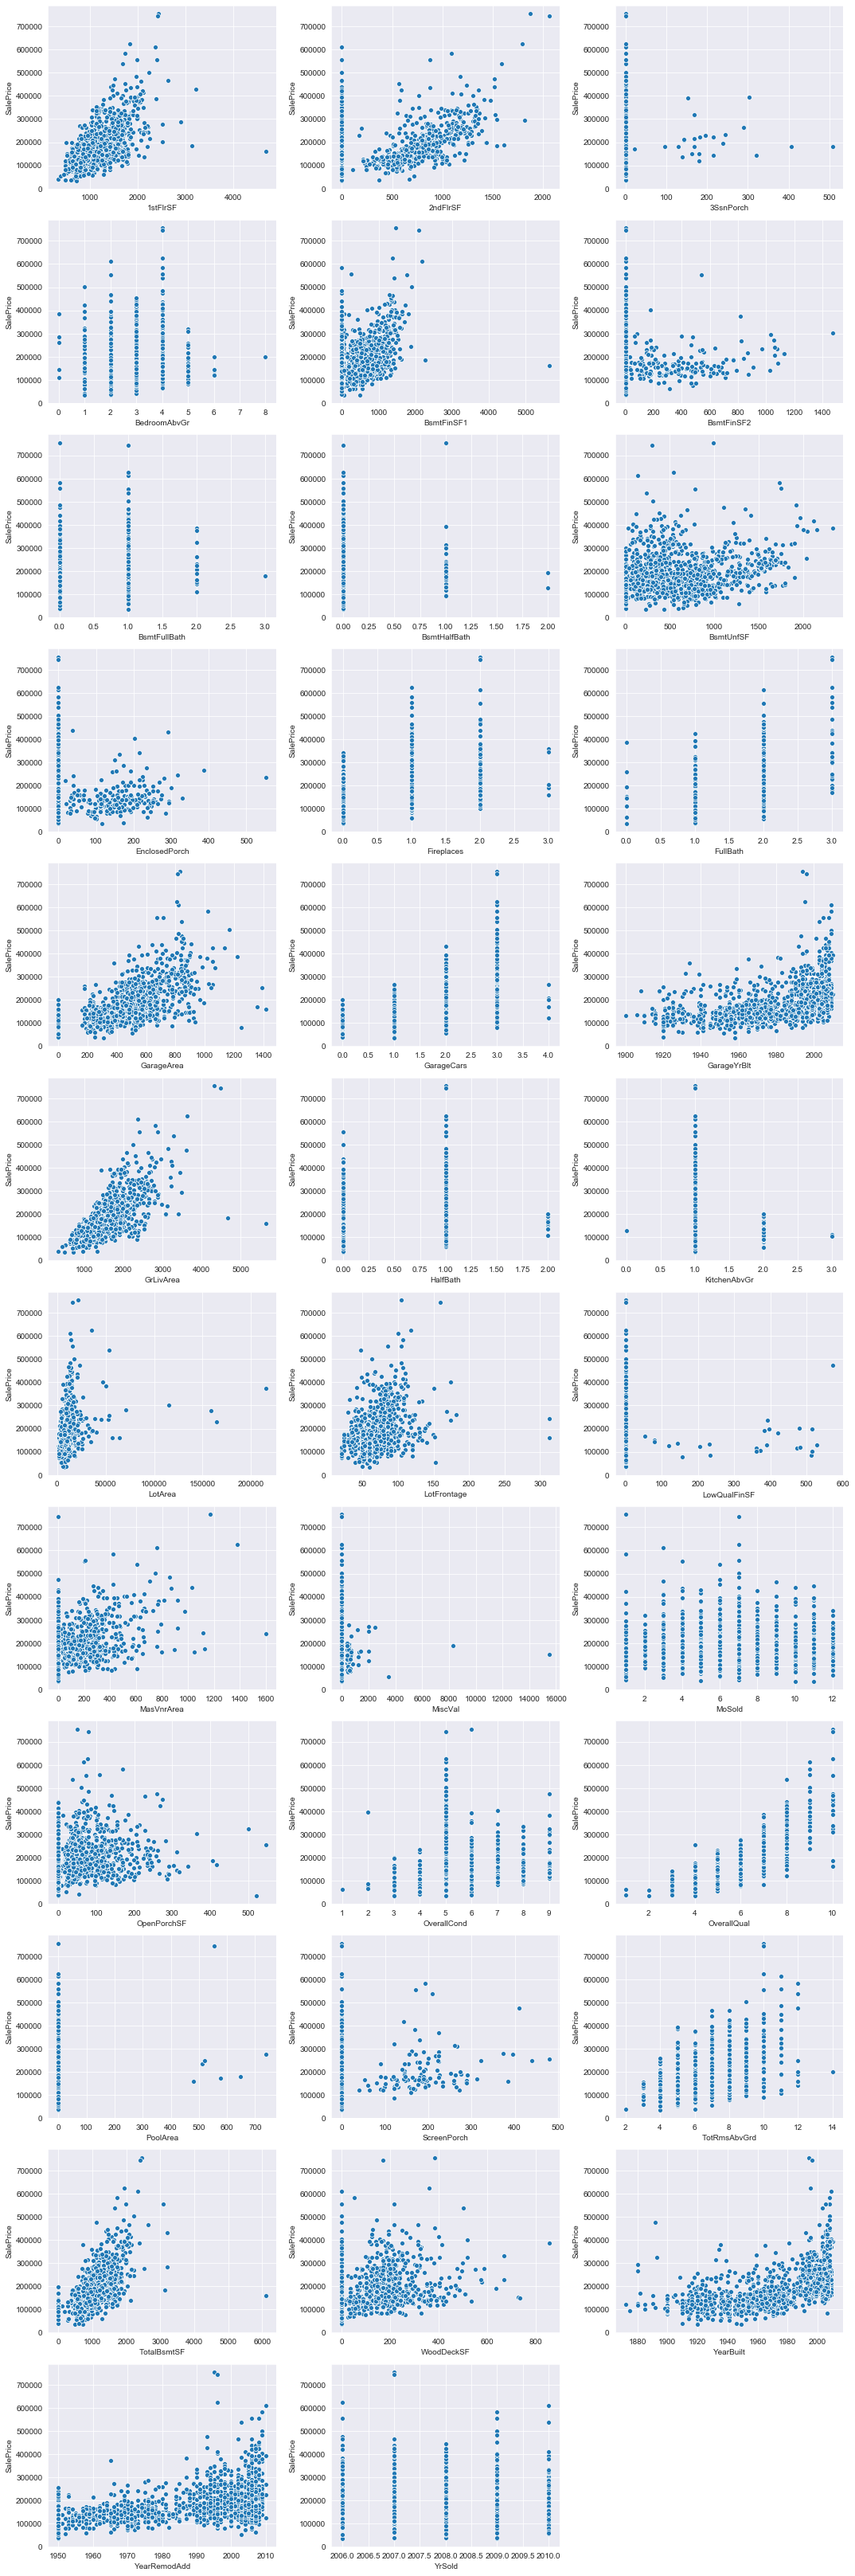

In [25]:
fig = plt.figure(figsize=(15,45))
for index,col in enumerate(x_numeric_list):
    plt.subplot(12,3,index+1)
    sns.scatterplot(x=col,y='SalePrice',data=train)
fig.tight_layout(pad=1.0)

### 3. Data Preprocessing Step

##### 3.1 Remove Redundant Features

Now we will check for the % of values missing in each feature.

In [26]:
miss_df = pd.DataFrame({'Feature':x_full.columns,'Nmiss':x_full.isnull().sum()})
miss_df['Miss %'] = np.round((miss_df['Nmiss']/x_full.shape[0])*100,2)
miss_df.sort_values(by='Miss %',ascending=False).head(5)

,Feature,Nmiss,Miss %
PoolQC,PoolQC,2909,99.66
MiscFeature,MiscFeature,2814,96.40
Alley,Alley,2721,93.22
Fence,Fence,2348,80.44
FireplaceQu,FireplaceQu,1420,48.65


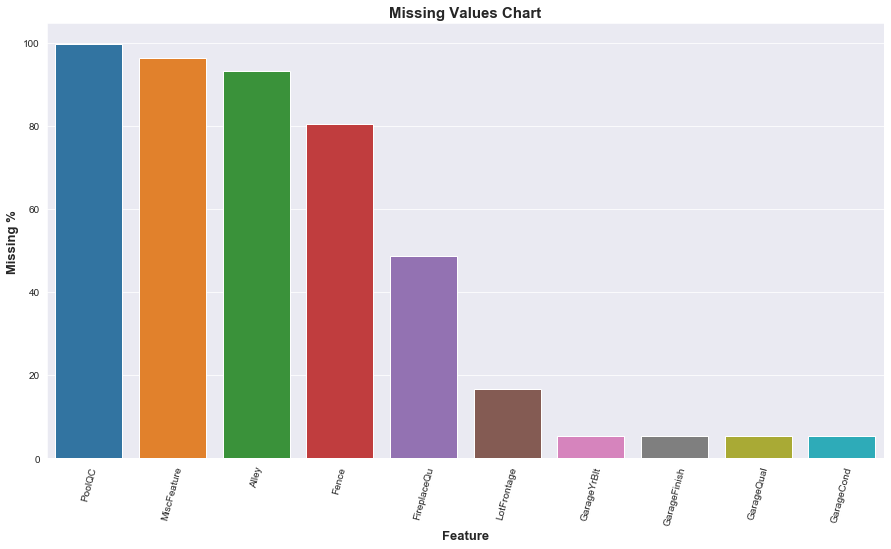

In [27]:
miss_df = miss_df.sort_values(by='Miss %',ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(x='Feature',y='Miss %',data=miss_df);
plt.xticks(rotation=75)
plt.xlabel('Feature',fontsize=13,fontweight='bold')
plt.ylabel('Missing %',fontsize=13,fontweight='bold')
plt.title('Missing Values Chart',fontsize=15,fontweight='bold')
plt.show();

From the above graph and **miss_df** dataframe we can see that features - 
* PoolQC , 
* MiscFeature and 
* Alley 

has more than 90% missing values. so we can drop these variables as these will not going to make too much of contribution in prediction.

In [28]:
x_full.drop(columns=['PoolQC','MiscFeature','Alley'],axis=1,inplace=True)
x_full.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2008,WD,Normal


In [29]:
for i in ['PoolQC','MiscFeature','Alley']:
    x_categoric_list.remove(i)
print(x_categoric_list)

print("\n number of categorical feature: ",len(x_categoric_list))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

 number of categorical feature:  54


In [30]:
x_full[x_categoric_list].shape

(2919, 54)

Now we will analyze the distribution of unique values in categorical features list "x_categoric_list". 

Basically , we are checking which value dominates the category or maximum % of value which is present in each categorical feature

In [31]:
xcategory_dist = [(x_full[c].value_counts().iloc[0]/len(x_full))*100 for c in x_categoric_list ]

df_catdist = pd.DataFrame({'Feature':x_categoric_list,
             'Value':xcategory_dist}).sort_values(by='Value',ascending=False)

df_catdist.head(10)

,Feature,Value
4,Utilities,99.897225
1,Street,99.588900
9,Condition2,98.972251
13,RoofMatl,98.526893
25,Heating,98.458376
48,KitchenAbvGr,95.409387
6,LandSlope,95.169579
44,BsmtHalfBath,93.936280
27,CentralAir,93.285372
30,Functional,93.079822


In [32]:
xnumeric_dist = [(x_full[c].value_counts().iloc[0]/len(x_full))*100 for c in x_numerical_features]

df_numdist = pd.DataFrame({'Feature':x_numerical_features,
             'Value':xnumeric_dist}).sort_values(by='Value',ascending=False)

df_numdist.head(10)

,Feature,Value
16,PoolArea,99.554642
2,3SsnPorch,98.732443
12,LowQualFinSF,98.629668
14,MiscVal,96.471394
17,ScreenPorch,91.229873
4,BsmtFinSF2,88.078109
6,EnclosedPorch,84.275437
13,MasVnrArea,59.540939
1,2ndFlrSF,57.142857
19,WoodDeckSF,52.175403


from above analysis we can see that in 

**1.** categorical variable list - Utilities,Street,Condition2,RoofMatl,Heating

**2.** Numerical variable list - PoolArea,3SsnPorch,LowQualFinSF,MiscVal

are the variables that have more than 96% ( if we take 96% as our cutoff) same values(dominant value) across the rows. so we can drop these variables as well

We will drop MoSold and YrSold variable. Because these variables don't have relevant relationship with target

In [33]:
x_full.drop(columns=['MoSold','YrSold'],axis=1,inplace=True)
x_full.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,NaN,0,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,NaN,0,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,NaN,0,WD,Normal


In [34]:
for i in ['MoSold','YrSold']:
    x_categoric_list.remove(i)
    x_discrete.remove(i)
print(x_categoric_list)
print("\n\n",x_discrete)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


 ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


Now we will drop variables identfied in our analysis of unique values distribution - 

1. categorical variable list - Utilities,Street,Condition2,RoofMatl,Heating

2. Numerical variable list - PoolArea,3SsnPorch,LowQualFinSF,MiscVal

In [35]:
for i in ['Utilities','Street','Condition2','RoofMatl','Heating']:
    x_categoric_list.remove(i)

print("\n\n",x_categoric_list)



 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


In [36]:
x_full.drop(columns=['Utilities','Street','Condition2','RoofMatl','Heating'],axis=1,inplace=True)


In [37]:
for i in ['PoolArea','3SsnPorch','LowQualFinSF','MiscVal']:
    x_numerical_features.remove(i)

print("\n\n",x_numerical_features)



 ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']


In [38]:
x_full.drop(columns=['PoolArea','3SsnPorch','LowQualFinSF','MiscVal'],axis=1,inplace=True)

###### Removing feature with multicollinearity

From above correlation matrix and heatmap we can see that , we have below feature which has high correlation . so we will drop these as well

* GarageYrBlt and YearBuilt

* TotRmsAbvGrd and GrLivArea

* 1stFlrSF and TotalBsmtSF

* GarageArea and GarageCars

In [39]:
x_full.drop(columns=['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'],axis=1,inplace=True)

In [40]:
x_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

###### 3.2 Outlier Treatment

in boxplot analysis we can see that below features have extreme outliers - 

* BsmtFinSF1

* LotArea

* LotFrontage

* GrLivArea

* TotalBsmtSF

We will treat these features just by clipping them

In [41]:
x_full['BsmtFinSF1'].quantile(0.99)

1635.3199999999997

In [42]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99),lower = x.quantile(0.01))
    return x


In [43]:
x_full[['BsmtFinSF1','LotArea','LotFrontage','GrLivArea','TotalBsmtSF']].apply(lambda x: outlier_capping(x))

,BsmtFinSF1,LotArea,LotFrontage,GrLivArea,TotalBsmtSF
Id,,,,,
1,706.0,8450.0,65.00,1710.0,856.0
2,978.0,9600.0,80.00,1262.0,1262.0
3,486.0,11250.0,68.00,1786.0,920.0
4,216.0,9550.0,60.00,1717.0,756.0
5,655.0,14260.0,84.00,2198.0,1145.0
...,...,...,...,...,...
2915,0.0,1936.0,21.00,1092.0,546.0
2916,252.0,1894.0,21.00,1092.0,546.0
2917,1224.0,20000.0,135.68,1224.0,1224.0


###### 3.3 Missing Values Treatment

In [44]:
x_full.shape

(2919, 61)

In [45]:
miss_df = pd.DataFrame({'Feature':x_full.columns, 'Nmiss':x_full.isnull().sum()}).sort_values(by='Nmiss',ascending=False)

miss_df = miss_df[miss_df['Nmiss']!=0]
miss_df

,Feature,Nmiss
Fence,Fence,2348
FireplaceQu,FireplaceQu,1420
LotFrontage,LotFrontage,486
GarageFinish,GarageFinish,159
GarageCond,GarageCond,159
GarageQual,GarageQual,159
GarageType,GarageType,157
BsmtCond,BsmtCond,82
BsmtExposure,BsmtExposure,82
BsmtQual,BsmtQual,81


In [46]:
miss_df.shape

(28, 2)

Now we will impute the features differently as per their behaviour beacuse from above analysis we have seen that some features are ordinal , some are categorical and numerical.

###### 3.3.1 Ordinal Feature - Missing values

By reading the **'Data/data_description.txt'** file we came to know that below features are ordinal in nature

We will impute the missing values by replacing it with 'NA' and then will encode it into separate category later.

In [47]:
x_full.BsmtFinType1.value_counts()

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64

In [48]:
ordinal_feature = list(['GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence','KitchenQual'])

print("Number of ordinal feature :",len(ordinal_feature),"\n\n")
print(ordinal_feature)


Number of ordinal feature : 11 


['GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'GarageCond', 'GarageQual', 'BsmtCond', 'BsmtQual', 'FireplaceQu', 'Fence', 'KitchenQual']


In [49]:
x_full[ordinal_feature] = x_full[ordinal_feature].fillna('NA')

In [50]:
x_full['GarageFinish'].value_counts()

Unf    1230
RFn     811
Fin     719
NA      159
Name: GarageFinish, dtype: int64

###### 3.3.2 Categorical Feature - Missing values

Below features are categorical in nature and one way to impute them by replacing it with most frequent value across each feature(Mode).

In [51]:
categorical_feature = ['GarageType',"SaleType", "Electrical", "Functional","MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd"]

print("Number of categorical feature :",len(categorical_feature),"\n\n")
print(categorical_feature)

Number of categorical feature : 8 


['GarageType', 'SaleType', 'Electrical', 'Functional', 'MasVnrType', 'MSZoning', 'Exterior1st', 'Exterior2nd']


In [52]:
### We are getting count of each feature across Neighborhood

x_full.groupby('Neighborhood')[categorical_feature].agg('count')

,GarageType,SaleType,Electrical,Functional,MasVnrType,MSZoning,Exterior1st,Exterior2nd
Neighborhood,,,,,,,,
Blmngtn,28,28,28,28,28,28,28,28
Blueste,10,10,10,10,10,10,10,10
BrDale,29,30,30,30,30,30,30,30
BrkSide,96,108,108,108,108,108,108,108
ClearCr,43,44,44,44,44,44,44,44
CollgCr,265,267,267,267,265,267,267,267
Crawfor,103,103,103,103,102,103,103,103
Edwards,157,194,194,194,193,194,193,193
Gilbert,165,165,165,165,160,165,165,165


so we can also impute missing values for each category by replacing mode across Neighborhood

In [53]:
## we are grouping the categorical_feature by Neighborhood 
## then imputing missing values by mode across neighborhood for each categorical feature

x_full[categorical_feature] = x_full.groupby('Neighborhood')[categorical_feature].transform(lambda x : x.fillna(x.mode()[0]))

###### 3.3.3 Numerical Feature - Missing values

In [54]:
miss_df_new = pd.DataFrame({'Feature':x_full.columns, 'Nmiss':x_full.isnull().sum()}).sort_values(by='Nmiss',ascending=False)

miss_df_new = miss_df_new[miss_df_new['Nmiss']!=0]
miss_df_new

,Feature,Nmiss
LotFrontage,LotFrontage,486
MasVnrArea,MasVnrArea,23
BsmtFullBath,BsmtFullBath,2
BsmtHalfBath,BsmtHalfBath,2
BsmtFinSF2,BsmtFinSF2,1
GarageArea,GarageArea,1
BsmtUnfSF,BsmtUnfSF,1
BsmtFinSF1,BsmtFinSF1,1
TotalBsmtSF,TotalBsmtSF,1


we can impute the numerical feature as well by mean values across neighborhood or across feature

In [55]:
numerical_feature = ["LotFrontage", "MasVnrArea", "BsmtHalfBath","BsmtFullBath", "BsmtUnfSF", "GarageArea", "TotalBsmtSF","BsmtFinSF1","BsmtFinSF2"]

print("Number of numerical feature :",len(numerical_feature),"\n\n")
print(numerical_feature)

Number of numerical feature : 9 


['LotFrontage', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2']


In [56]:
x_full[numerical_feature] = x_full.groupby('Neighborhood')[numerical_feature].transform(lambda x : x.fillna(x.mean()))

**MSSubClass** is a categorical feature in nature so we will change its data type

In [57]:
x_full['MSSubClass'].value_counts()

20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [58]:
#x_full['MSSubClass'] = x_full['MSSubClass'].apply(str)   ### applying string function on each value of MSSubClass

###### 3.4 Mapping ordinal feature to numeric values

In [59]:
print(ordinal_feature)

['GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'GarageCond', 'GarageQual', 'BsmtCond', 'BsmtQual', 'FireplaceQu', 'Fence', 'KitchenQual']


In [60]:
for i in ordinal_feature:
    print(i,":\n")
    print(x_full[i].unique())
    print("\n****************************************************")


GarageFinish :

['RFn' 'Unf' 'Fin' 'NA']

****************************************************
BsmtFinType2 :

['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']

****************************************************
BsmtExposure :

['No' 'Gd' 'Mn' 'Av' 'NA']

****************************************************
BsmtFinType1 :

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']

****************************************************
GarageCond :

['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']

****************************************************
GarageQual :

['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']

****************************************************
BsmtCond :

['TA' 'Gd' 'NA' 'Fa' 'Po']

****************************************************
BsmtQual :

['Gd' 'TA' 'Ex' 'NA' 'Fa']

****************************************************
FireplaceQu :

['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

****************************************************
Fence :

['NA' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

************************************************

on the basis of above categories we can encode these ordinal features into numerical values by mapping it

In [61]:
### defeining different maps for different feature

BsmtFinType_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}

BsmtExposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}

map1 = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}

fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

Garage_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}


In [62]:
x_full['Fence'] = x_full['Fence'].map(fence_map)

x_full['BsmtExposure'] = x_full['BsmtExposure'].map(BsmtExposure_map)

x_full['GarageFinish'] = x_full['GarageFinish'].map(Garage_map)

In [63]:
for i in ['BsmtFinType1','BsmtFinType2']:
    x_full[i] = x_full[i].map(BsmtFinType_map)

In [64]:
for i in ['BsmtQual','BsmtCond','ExterQual','ExterCond','GarageQual','GarageCond','HeatingQC','KitchenQual','FireplaceQu']:
    x_full[i] = x_full[i].map(map1)


In [65]:
x_full[ordinal_feature]

,GarageFinish,BsmtFinType2,BsmtExposure,BsmtFinType1,GarageCond,GarageQual,BsmtCond,BsmtQual,FireplaceQu,Fence,KitchenQual
Id,,,,,,,,,,,
1,2,1,1,6,3,3,3,4,0,0,4
2,2,1,4,5,3,3,3,4,3,0,3
3,2,1,2,6,3,3,3,4,3,0,4
4,1,1,1,5,3,3,4,3,4,0,4
5,2,1,3,6,3,3,3,4,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2915,0,1,1,1,0,0,3,3,0,0,3
2916,1,1,1,3,3,3,3,3,0,0,3
2917,1,1,1,5,3,3,3,3,3,0,3


### 4. Feature Engineering 

###### 4.1 Creating New Features

In [66]:
x_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

we can derive new features from existing features such as below (Data/data_description.txt) :-

* New variable **'TotalBath'** can be created by combining variable 'FullBath' and 'HalfBath'

* New variable **'TotalBsmtFinSF'** can be created by combining 'BsmtFinSF1' and 'BsmtFinSF2'

* New variable which represent total land area **'TotalLot'** could be created by combining 'LotFrontage' and 'LotArea'

* New variable which represent surface area **'TotalSF'** could be created by combining 'TotalBsmtSF' and '2ndFlrSF'

* New variable which represent total porch Surface area **'TotalPorch'** could be created by combining 'OpenPorchSF' and 'EnclosedPorch' and 'ScreenPorch'


In [67]:
x_full[['FullBath','HalfBath','BsmtFinSF1','BsmtFinSF2','LotFrontage','LotArea','OpenPorchSF','EnclosedPorch','ScreenPorch']].head(3)

,FullBath,HalfBath,BsmtFinSF1,BsmtFinSF2,LotFrontage,LotArea,OpenPorchSF,EnclosedPorch,ScreenPorch
Id,,,,,,,,,
1,2,1,706.0,0.0,65.0,8450,61,0,0
2,2,0,978.0,0.0,80.0,9600,0,0,0
3,2,1,486.0,0.0,68.0,11250,42,0,0


In [68]:
x_full['TotalBath'] = x_full['FullBath'] + x_full['HalfBath']

x_full['TotalBsmtFinSF'] = x_full['BsmtFinSF1'] + x_full['BsmtFinSF2']

x_full['TotalLot'] = x_full['LotFrontage'] + x_full['LotArea']

x_full['TotalSF'] = x_full['TotalBsmtSF'] + x_full['2ndFlrSF']

x_full['TotalPorch'] = x_full['OpenPorchSF'] + x_full['EnclosedPorch'] + x_full['ScreenPorch']

Now we will drop the original columns

In [69]:
x_full.drop(columns=['FullBath','HalfBath','BsmtFinSF1','BsmtFinSF2','LotFrontage','LotArea','OpenPorchSF','EnclosedPorch','ScreenPorch'],axis=1,inplace=True)

print(x_full.columns)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'Fence', 'SaleType', 'SaleCondition', 'TotalBath', 'TotalBsmtFinSF',
       'TotalLot', 'TotalSF', 'TotalPorch'],
      dtype='object')


Now we will check how many categorical feature remains untreated and we need to convert those into numerical feature accordingly

In [70]:
catlist1 = [c for c in x_full.columns if x_full[c].dtypes in ['object']]
print(catlist1)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [71]:
x_full[catlist1]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,CentralAir,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,MetalSd,None,CBlock,Y,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,Y,WD,Normal
4,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,Wd Shng,None,BrkTil,Y,SBrkr,Typ,Detchd,Y,WD,Abnorml
5,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,Y,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,CmentBd,None,CBlock,Y,SBrkr,Typ,Attchd,Y,WD,Normal
2916,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,CmentBd,None,CBlock,Y,SBrkr,Typ,CarPort,Y,WD,Abnorml
2917,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,VinylSd,None,CBlock,Y,SBrkr,Typ,Detchd,Y,WD,Abnorml


Apart from 'MSSubClass' we will convert all the above variables into numerical features beacuse as we can see that MSSubClass is already has numeric values as category

In [72]:
#catlist1.remove('MSSubClass')
print(catlist1)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [73]:
def create_dummies(df,col):
    dummy_df = pd.get_dummies(df[col],prefix=col)
    dummy_df.drop(dummy_df.columns[0],axis=1,inplace=True)
    df = pd.concat([df,dummy_df],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [74]:
for col in catlist1:
    x_full = create_dummies(x_full,col)

In [75]:
x_full.shape

(2919, 168)

In [76]:
x_full.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,7,5,2003,2003,196.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
2,20,6,8,1976,1976,0.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
3,60,7,5,2001,2002,162.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0
4,70,7,5,1915,1970,0.0,3,3,3,4,...,0,0,0,0,1,0,0,0,0,0
5,60,8,5,2000,2000,350.0,4,3,4,3,...,0,0,0,0,1,0,0,0,1,0


###### 4.2 Target label distribution and transformation

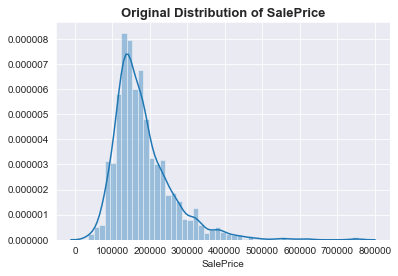

In [77]:
plt.figure(figsize=(6,4))
plt.title('Original Distribution of SalePrice',fontsize=13,fontweight='bold')
sns.distplot(train['SalePrice']);


SalePrice is right skewed so we can try log transformation on it and then see its distribution

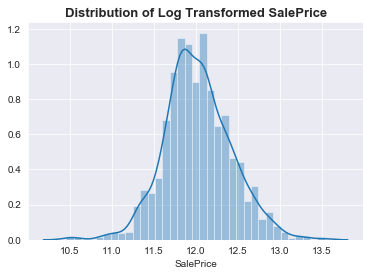

In [78]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Log Transformed SalePrice',fontsize=13,fontweight='bold')
sns.distplot(np.log(train['SalePrice']));

After applying log transformation, we can see that SalePrice has normal distribution

In [79]:
train['SalePrice_log'] = np.log(train['SalePrice'])

In [80]:
train[['SalePrice','SalePrice_log']].head()

,SalePrice,SalePrice_log
Id,,
1,208500,12.247694
2,181500,12.109011
3,223500,12.317167
4,140000,11.849398
5,250000,12.429216


### 5. Model Building

##### 5.1 Train - validation split

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
print("train shape: ",train.shape)
print("test shape: ",test.shape)
print("x_full shape: ",x_full.shape)

train shape:  (1460, 81)
test shape:  (1459, 79)
x_full shape:  (2919, 168)


In [83]:
### separating train and test dataset

x = x_full.loc[train.index]
y = train['SalePrice_log']

test = x_full.loc[test.index]

##### 5.2 Feature Scaling

In [84]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

In [85]:
x_new = x.copy()
x_cols = x_new.select_dtypes(np.number).columns

test_new = test.copy()

In [86]:
scaler = StandardScaler().fit(x_new[x_cols])

x_new[x_cols] = scaler.transform(x_new[x_cols])
test_new[x_cols] = scaler.transform(test_new[x_cols])

In [87]:
x_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,0.651479,-0.517200,1.050994,0.878668,0.510164,1.052302,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-0.872563,-0.071836,2.179628,0.156734,-0.429577,-0.574932,-0.689604,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.073375,0.651479,-0.517200,0.984752,0.830215,0.321933,1.052302,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,0.309859,0.651479,-0.517200,-1.863632,-0.720298,-0.574932,-0.689604,-0.238112,-0.558153,1.929579,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
5,0.073375,1.374795,-0.517200,0.951632,0.733308,1.362739,1.052302,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [88]:
test_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.872563,-0.795151,0.381743,-0.340077,-1.156380,-0.574932,-0.689604,-0.238112,-0.558153,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1462,-0.872563,-0.071836,0.381743,-0.439440,-1.301740,0.022978,-0.689604,-0.238112,-0.558153,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1463,0.073375,-0.795151,-0.517200,0.852269,0.636400,-0.574932,-0.689604,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1464,0.073375,-0.071836,0.381743,0.885390,0.636400,-0.464208,-0.689604,-0.238112,-0.558153,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1465,1.492282,1.374795,-0.517200,0.686666,0.345679,-0.574932,1.052302,-0.238112,0.583168,0.117884,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [89]:
x_train,x_val,y_train,y_val = train_test_split(x_new,y,test_size=0.25,random_state=1001)

print("Train data shape: ",x_train.shape)
print("Validation data shape: ",x_val.shape)

Train data shape:  (1095, 168)
Validation data shape:  (365, 168)


### 5.3 Ensemble Algorithms

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [106]:
Model_perf = pd.DataFrame(columns=['Model','Train score','Validation score','MAE','RMSE','Score'])

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score


In [107]:
def model_scoring(model,model_name,Model_perf):
   
    temp = pd.DataFrame()
    
    temp['Model'] = [str(model_name)]
    temp['Train score'] = [cross_val_score(model,x_train,y_train,cv=5).mean()]
    temp['Validation score'] = [cross_val_score(model,x_val,y_val,cv=5).mean()]
    temp['MAE'] = [mean_absolute_error(y_val,model.predict(x_val))]
    temp['RMSE'] = [np.sqrt(mean_squared_error(y_val,model.predict(x_val)))]
    temp['Score'] = [model.score(x_val,y_val)]
    
    Model_perf = pd.concat([Model_perf,temp],axis=0)
    return Model_perf
    

#### 5.3.1 Bagging 

In [108]:
bag = BaggingRegressor(oob_score=True,random_state=100)

param_list = {'n_estimators':[100,250,500,750,1000]}

bag_reg = GridSearchCV(estimator=bag,
                   param_grid=param_list,
                   scoring='neg_root_mean_squared_error',
                   cv=5)

In [109]:
bag_model = bag_reg.fit(x_train,y_train)

In [110]:
best_param = bag_model.best_params_
bag_best = BaggingRegressor(**best_param,random_state=100)
bag_best.fit(x_train,y_train)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=False, random_state=100, verbose=0,
                 warm_start=False)

In [111]:
Model_perf = model_scoring(bag_best,'Bagging',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.86741,0.098837,0.148316,0.883611


#### 5.3.2. Random Forest

In [112]:
forest = RandomForestRegressor(oob_score=True,random_state=100)

param_list = {'n_estimators':[100,250,500,750,1000],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[3,6,9,10]}

forest_reg = GridSearchCV(estimator=forest,
                         param_grid=param_list,
                         scoring='neg_root_mean_squared_error',
                         cv=5)

In [113]:
forest_model = forest_reg.fit(x_train,y_train)

In [114]:
best_param = forest_model.best_params_

forest_best = RandomForestRegressor(**best_param,random_state=100)
forest_best.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [115]:
Model_perf = model_scoring(forest_best,'Random Forest',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111


##### Feature Importance

In [116]:
forest_best.feature_importances_

array([7.04978691e-03, 8.56316759e-02, 7.74863627e-03, 4.92204809e-02,
       2.93580716e-02, 1.12237131e-02, 4.99941696e-02, 3.21879944e-03,
       4.18614921e-02, 3.36369552e-03, 5.58977130e-03, 1.39869061e-02,
       2.07590373e-03, 8.61263967e-03, 4.72728368e-02, 1.30911677e-02,
       1.87618798e-02, 6.62779326e-02, 3.28343147e-03, 5.63048095e-04,
       7.26607503e-03, 1.36078816e-03, 4.07961933e-02, 2.14178894e-02,
       2.46088632e-02, 3.12304088e-02, 4.38656745e-02, 9.57353511e-03,
       1.05382497e-02, 7.15584846e-03, 1.37967978e-03, 3.31310654e-02,
       2.11780474e-02, 2.76722495e-02, 8.47029749e-02, 7.93286036e-03,
       4.43822083e-04, 2.03098353e-04, 4.31125185e-03, 6.23202435e-03,
       3.32548619e-04, 2.38248670e-04, 2.37588908e-03, 4.98880571e-04,
       8.59797713e-04, 1.27860880e-03, 5.78327944e-04, 2.32098115e-04,
       2.27739401e-05, 1.13082758e-03, 1.18017813e-03, 2.60354094e-04,
       0.00000000e+00, 2.49937433e-04, 9.63526290e-04, 7.62816770e-04,
      

In [117]:
indices = np.argsort(forest_best.feature_importances_)[::-1]

In [118]:
range(x_train.shape[1])

range(0, 168)

In [119]:
indices = np.argsort(forest_best.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         forest_best.feature_importances_[indices[f]]]

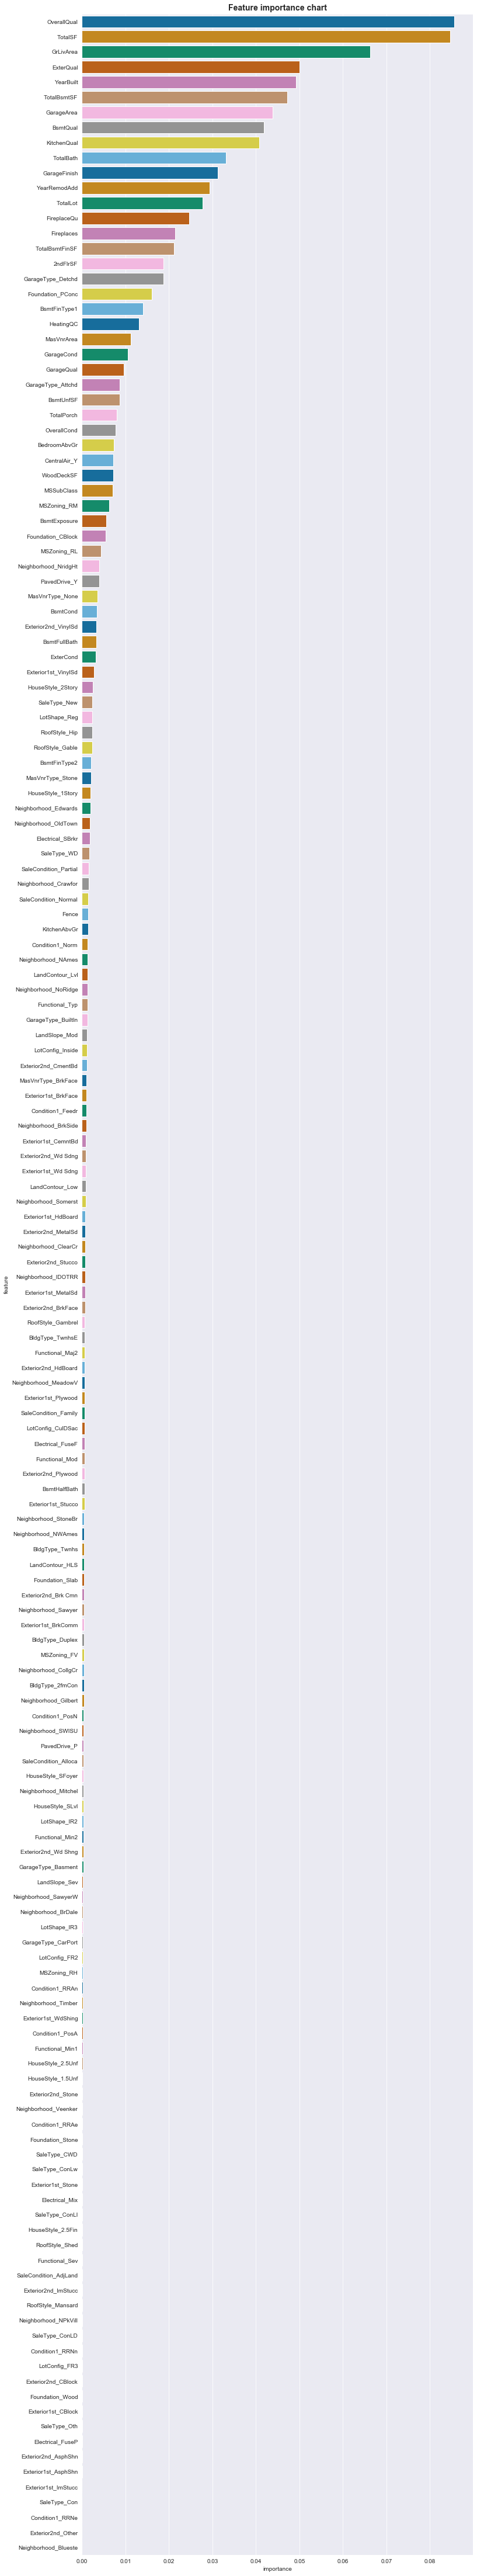

In [120]:
plt.figure(figsize=(12,80))
plt.title("Feature importance chart",fontsize=14,fontweight='bold')
sns.barplot( y = 'feature', x = 'importance', data = feature_rank,palette='colorblind');

#### 5.3.3 Ada Boosting

In [123]:
adaBoost = AdaBoostRegressor(random_state=100)

param_list= {'n_estimators':[100,250,500,750,1000],
            'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5]}


adaBoost_reg = GridSearchCV(estimator=adaBoost,
                         param_grid=param_list,
                         scoring='neg_root_mean_squared_error',
                         cv=5)

In [124]:
adaBoost_model = adaBoost_reg.fit(x_train,y_train)

In [125]:
best_param = adaBoost_model.best_params_

adaBoost_best = AdaBoostRegressor(**best_param,random_state=100)
adaBoost_best.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=250, random_state=100)

In [126]:
Model_perf = model_scoring(adaBoost_best,'AdaBoost',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658


#### 5.3.4 Gradient Boosting

In [127]:
GrdBoost = GradientBoostingRegressor(criterion='mse',random_state=100)

param_list = {'n_estimators':[100,250,500,750,1000],
            'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5],
             'max_depth':[3,6,9,10],
             'max_features':['auto','sqrt','log2']}

GrdBoost_reg = GridSearchCV(estimator=GrdBoost,
            param_grid=param_list,
            scoring='neg_root_mean_squared_error',
            cv=5)

In [128]:
GrdBoost_model = GrdBoost_reg.fit(x_train,y_train)

In [129]:
best_param = GrdBoost_model.best_params_

GrdBoost_best = GradientBoostingRegressor(**best_param,criterion='mse',random_state=100)
GrdBoost_best.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=100, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
Model_perf = model_scoring(GrdBoost_best,'Gradient Boosting',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658
0,Gradient Boosting,0.890054,0.888977,0.088996,0.135023,0.903540


#### 5.3.5 XGBOOST

In [131]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror',random_state=100)


param_list = {'n_estimators':[100,250,500,750,1000],
            'learning_rate':[0.001, 0.01, 0.1, 0.15, 0.2],
             'max_depth':[3,6,9,10],
              'reg_alpha':[0.0001,0.001,0.01],
              'reg_gamma':[0.0001,0.001,0.01],
              'min_child_weight':[1,5,10,20]
             }

xgb_reg = RandomizedSearchCV(estimator = xgb, 
                             param_distributions = param_list,
                              n_iter = 100, 
                             scoring = 'neg_root_mean_squared_error',
                              cv = 5)

In [132]:
xgb_model = xgb_reg.fit(x_train,y_train)

In [133]:
best_param = xgb_model.best_params_

xgb_best = XGBRegressor(**best_param,objective='reg:squarederror',random_state=100)
xgb_best.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=3, min_child_weight=20, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=0.001, reg_gamma=0.001, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [134]:
Model_perf = model_scoring(xgb_best,'XGBOOST',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658
0,Gradient Boosting,0.890054,0.888977,0.088996,0.135023,0.903540
0,XGBOOST,0.882424,0.862124,0.086518,0.129332,0.911500


#### 5.3.6 Light GBM

In [135]:
lgbm = LGBMRegressor(objective='regression',random_state=100)

param_list = {'n_estimators':[100,250,500,750,1000],
            'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5],
             'max_depth':[3,6,9,10],
              'reg_alpha' : [0.0001, 0.001, 0.01],
             'reg_lambda' : [0, 0.0001, 0.001, 0.01],
            'min_child_samples' : [5, 10, 15,20,25],
              'feature_fraction':[0.4,0.6,0.8]
            }

lgbm_reg = RandomizedSearchCV(estimator = lgbm, 
                             param_distributions = param_list,
                              n_iter = 100, 
                             scoring = 'neg_root_mean_squared_error',
                              cv = 5)

In [136]:
lgbm_model = lgbm_reg.fit(x_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, co

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, co

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 wil

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, co

In [137]:
best_param = lgbm_model.best_params_

lgbm_best = LGBMRegressor(**best_param,objective='regression',random_state=100)
lgbm_best.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.4, importance_type='split', learning_rate=0.1,
              max_depth=6, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=100, reg_alpha=0.001,
              reg_lambda=0.01, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [138]:
Model_perf = model_scoring(lgbm_best,'LightGBM',Model_perf)

Model_perf

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current 

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658
0,Gradient Boosting,0.890054,0.888977,0.088996,0.135023,0.903540
0,XGBOOST,0.882424,0.862124,0.086518,0.129332,0.911500
0,LightGBM,0.884216,0.872224,0.083651,0.126762,0.914983


#### 5.3.7 CatBoost

In [140]:
cb = CatBoostRegressor(random_state=100,logging_level='Silent')

param_list = {'n_estimators':[100,250,500,750,1000],
            'learning_rate':[0.01, 0.1, 0.15, 0.3, 0.5],
             'max_depth':[3,6,9,10],
              'l2_leaf_reg' : [0.001, 0.01, 0.1],
              'random_strength' : [0.25, 0.5 ,1],
              'min_child_samples' : [2, 5, 10, 15, 20],
               'rsm' : [0.5, 0.7, 0.9]
             }

cb_reg = RandomizedSearchCV(estimator = cb, 
                             param_distributions = param_list,
                              n_iter = 100, 
                             scoring = 'neg_root_mean_squared_error',
                              cv = 5)

In [141]:
cb_model = cb_reg.fit(x_train,y_train)

In [142]:
best_param = cb_model.best_params_

cb_best = CatBoostRegressor(**best_param,logging_level='Silent',random_state=100)
cb_best.fit(x_train,y_train)

In [143]:
Model_perf = model_scoring(cb_best,'CatBoost',Model_perf)

Model_perf

,Model,Train score,Validation score,MAE,RMSE,Score
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658
0,Gradient Boosting,0.890054,0.888977,0.088996,0.135023,0.903540
0,XGBOOST,0.882424,0.862124,0.086518,0.129332,0.911500
0,LightGBM,0.884216,0.872224,0.083651,0.126762,0.914983
0,CatBoost,0.896885,0.889383,0.086678,0.131306,0.908778


In [147]:
Model_perf.sort_values(by='Score',ascending=False)

,Model,Train score,Validation score,MAE,RMSE,Score
0,LightGBM,0.884216,0.872224,0.083651,0.126762,0.914983
0,XGBOOST,0.882424,0.862124,0.086518,0.129332,0.911500
0,CatBoost,0.896885,0.889383,0.086678,0.131306,0.908778
0,Gradient Boosting,0.890054,0.888977,0.088996,0.135023,0.903540
0,Bagging,0.855973,0.867410,0.098837,0.148316,0.883611
0,Random Forest,0.859001,0.855512,0.100408,0.158482,0.867111
0,AdaBoost,0.806439,0.815034,0.134706,0.183080,0.822658


### 5.4 Blending

We can use blending technique in which we will provide different weights to different models and then calculate the predication made by these models

In [148]:
def blending_model(model1,model2,model3,w1,w2,w3):
    test_pred = (w1 * model1.predict(test_new)) + (w2* model2.predict(test_new)) + (w3* model3.predict(test_new))
    return test_pred

#### 5.4.1 Blending ( xgb, catboost, GrdBoost)

we will take exp. of target as we have applied log transformation on the 'SalePrice'

In [154]:
pred1 = np.exp(blending_model(xgb_best,cb_best,GrdBoost_best,0.8,0.6,0.5))

In [155]:
pred1

array([5.11997844e+09, 7.66812970e+09, 1.03741308e+10, ...,
       7.87683168e+09, 4.17786878e+09, 1.25401030e+10])

#### 5.4.2 Blending ( XGBoost, LightGBM, CatBoost)

In [158]:
pred2 = np.exp(blending_model(xgb_best,lgbm_best,cb_best,0.4,0.3,0.3))

In [159]:
pred2

array([128208.52116334, 159973.41058325, 186309.54549369, ...,
       165250.65639309, 116317.59934081, 208242.92339142])

In [164]:
submission = pd.DataFrame({'Id':test_new.index,'SalePrice':pred2})

In [165]:
submission.head()

,Id,SalePrice
0,1461,128208.521163
1,1462,159973.410583
2,1463,186309.545494
3,1464,191701.833072
4,1465,182675.963904


In [166]:
import os

In [169]:
dir_name = 'submission'

os.makedirs(dir_name,mode=775,exist_ok=True)
print(dir_name,"Directory Created")

submission Directory Created


In [171]:
submission.to_csv('submission/submission.csv',index=False)